# PREPROCESAMIENTO DE LOS DATOS

# IMPORTS

Importamos todo lo necesario para el desarrollo de la actividad.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
import os

import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# CARGA DATASETS

## Dataset uk_bank_holidays

Además de cargar el csv con el nombre 'uk_bank_holidays' hacemos un pequeño proceso de ETL donde miramos si hay algún valor nulo, vemos cuántos valores tiene el csv y comprobamos si hay algún valor duplicado.

In [ ]:
dfbank = pd.read_csv('uk_bank_holidays.csv')
dfbank.head()

,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)
4,2012-04-06,Spring bank holiday (substitute day)


In [ ]:
dfbank.isnull().sum()

Bank holidays    0
Type             0
dtype: int64

In [ ]:

dfbank.count()

Bank holidays    25
Type             25
dtype: int64

In [ ]:
dfbank_duplicates = dfbank.drop_duplicates()
len(dfbank_duplicates)

25

## Dataset weather_daily_darksky

Cargamos el dataset con el nombre 'weather_laily_darksky'. Este dataset es uno de los más importantes de cara al modelo. Pese al gran número de columnas que tenía, decidimos imprimir la matriz de correlación entre las diferentes columnas para eliminar aquellas que tuvieran menos correlación. Posteriormente, revisamos los nulos y borramos la fila que tenía un valor nulo, ya que apenas iba a influir en nuestro modelo.
También, comprobamos que no había valores duplicados y vimos que valores contenía la variable 'precipType'

In [ ]:
dfwea = pd.read_csv('weather_daily_darksky.csv', usecols = ['temperatureMax', 'icon',
       'dewPoint', 'temperatureMinTime', 'cloudCover', 'windSpeed', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'temperatureMaxTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'uvIndexTime','temperatureLowTime', 'apparentTemperatureMin'])
dfwea.head()

,temperatureMax,temperatureMaxTime,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,apparentTemperatureHigh,precipType,visibility,...,uvIndex,time,sunsetTime,temperatureLow,temperatureMin,temperatureHigh,sunriseTime,uvIndexTime,temperatureLowTime,apparentTemperatureMin
0,11.96,2011-11-11 23:00:00,fog,9.40,2011-11-11 07:00:00,0.79,3.88,10.87,rain,3.30,...,1.0,2011-11-11 00:00:00,2011-11-11 16:19:21,10.87,8.85,10.87,2011-11-11 07:12:14,2011-11-11 11:00:00,2011-11-11 19:00:00,6.48
1,8.59,2011-12-11 14:00:00,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,5.62,rain,12.09,...,1.0,2011-12-11 00:00:00,2011-12-11 15:52:53,3.09,2.48,8.59,2011-12-11 07:57:02,2011-12-11 12:00:00,2011-12-12 07:00:00,0.11
2,10.33,2011-12-27 02:00:00,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,10.33,rain,13.39,...,0.0,2011-12-27 00:00:00,2011-12-27 15:57:56,8.03,8.03,10.33,2011-12-27 08:07:06,2011-12-27 00:00:00,2011-12-27 23:00:00,5.59
3,8.07,2011-12-02 23:00:00,wind,3.69,2011-12-02 07:00:00,0.32,3.00,5.33,rain,11.89,...,1.0,2011-12-02 00:00:00,2011-12-02 15:56:17,6.33,2.56,7.36,2011-12-02 07:46:09,2011-12-02 10:00:00,2011-12-02 19:00:00,0.46
4,8.22,2011-12-24 23:00:00,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,5.02,rain,13.16,...,1.0,2011-12-24 00:00:00,2011-12-24 15:55:55,7.45,3.17,7.93,2011-12-24 08:06:15,2011-12-24 13:00:00,2011-12-24 19:00:00,-0.51


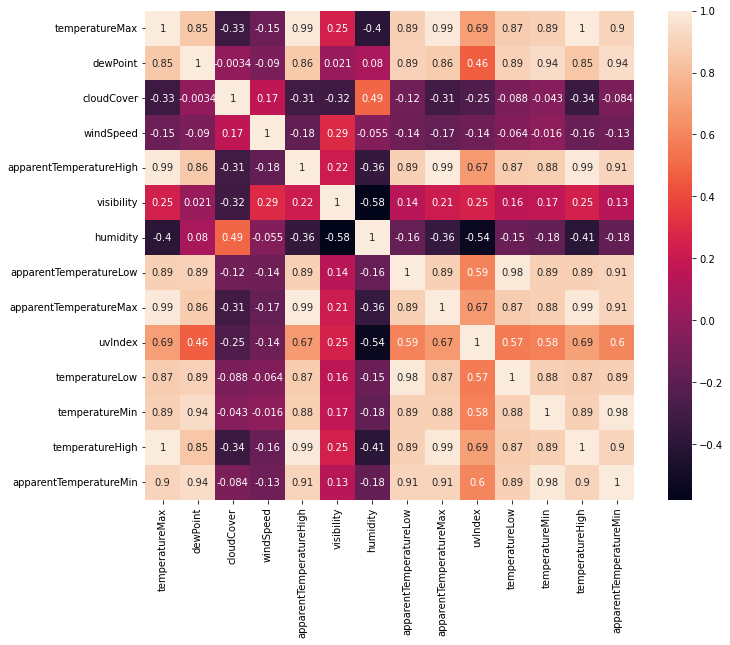

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 9))

corrMatriz=dfwea.corr()
sns.heatmap(corrMatriz, annot=True, square=100)
plt.show()

In [ ]:
len(dfwea)

882

In [ ]:
dfwea.isnull().sum()

temperatureMax             0
temperatureMaxTime         0
icon                       0
dewPoint                   0
temperatureMinTime         0
cloudCover                 1
windSpeed                  0
apparentTemperatureHigh    0
precipType                 0
visibility                 0
humidity                   0
apparentTemperatureLow     0
apparentTemperatureMax     0
uvIndex                    1
time                       0
sunsetTime                 0
temperatureLow             0
temperatureMin             0
temperatureHigh            0
sunriseTime                0
uvIndexTime                1
temperatureLowTime         0
apparentTemperatureMin     0
dtype: int64

In [ ]:
dfwea = dfwea.dropna()
len(dfwea)

881

In [ ]:
dfwea_duplicates = dfwea.drop_duplicates()
len(dfwea_duplicates)

881

In [ ]:
dfwea['precipType'].unique()

array(['rain', 'snow'], dtype=object)

## Dataset daily_dataset/block

El siguiente dataset a cargar nos venía dado en formato zip y, en su interior había una serie de csv. Para cargar todos ellos, tuvimos que generar un buble. Una vez unidos todos los csv, ya estaba listo para ser ampliado con más variables.

In [ ]:
dfdaily = pd.read_csv('daily_dataset/block_0.csv')
dfdaily.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000
1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076
2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070
3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070
4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087


In [ ]:
#std supongo que será la desviación típica, sudamos por completo de la columna si eso eeee.... JAJAJAJA
dfdaily.isnull().sum()

LCLid             0
day               0
energy_median     0
energy_mean       0
energy_max        0
energy_count      0
energy_std       78
energy_sum        0
energy_min        0
dtype: int64

In [ ]:
dfdaily['LCLid'].unique()

array(['MAC000002', 'MAC000246', 'MAC000450', 'MAC001074', 'MAC003223',
       'MAC003239', 'MAC003252', 'MAC003281', 'MAC003305', 'MAC003348',
       'MAC003388', 'MAC003394', 'MAC003400', 'MAC003422', 'MAC003423',
       'MAC003428', 'MAC003449', 'MAC003463', 'MAC003482', 'MAC003553',
       'MAC003557', 'MAC003566', 'MAC003579', 'MAC003597', 'MAC003613',
       'MAC003646', 'MAC003656', 'MAC003668', 'MAC003680', 'MAC003686',
       'MAC003718', 'MAC003719', 'MAC003737', 'MAC003740', 'MAC003775',
       'MAC003805', 'MAC003817', 'MAC003826', 'MAC003844', 'MAC003851',
       'MAC003856', 'MAC003863', 'MAC003874', 'MAC004034', 'MAC004179',
       'MAC004247', 'MAC004319', 'MAC004387', 'MAC004431', 'MAC005492'],
      dtype=object)

In [ ]:
#Hacer lo de half con daily
rutadaily = 'daily_dataset'
csv_daily = os.listdir(rutadaily)
csv_daily
archivos1 = []
for i in csv_daily:
    direccion = "daily_dataset/" + i
    archivos1.append(direccion)
archivos1

['daily_dataset/block_72-20211007-165038.csv',
 'daily_dataset/block_16.csv',
 'daily_dataset/block_27-20211007-165038.csv',
 'daily_dataset/block_11.csv',
 'daily_dataset/block_39-20211007-165039.csv',
 'daily_dataset/block_96-20211007-165041.csv',
 'daily_dataset/block_26-20211007-165033.csv',
 'daily_dataset/block_63.csv',
 'daily_dataset/block_77-20211007-165040.csv',
 'daily_dataset/block_68-20211007-165038.csv',
 'daily_dataset/block_24-20211007-165037.csv',
 'daily_dataset/block_64.csv',
 'daily_dataset/block_18.csv',
 'daily_dataset/block_74-20211007-165041.csv',
 'daily_dataset/block_80.csv',
 'daily_dataset/block_51.csv',
 'daily_dataset/block_28-20211007-165041.csv',
 'daily_dataset/block_7-20211007-165040.csv',
 'daily_dataset/block_2-20211007-165031.csv',
 'daily_dataset/block_63-20211007-165040.csv',
 'daily_dataset/block_87.csv',
 'daily_dataset/block_80-20211007-165039.csv',
 'daily_dataset/block_56.csv',
 'daily_dataset/block_1-20211007-165030.csv',
 'daily_dataset/blo

In [ ]:
list_data_daily = []
  
# Escribimos un loop que irá a través de cada uno de los nombres de archivo a través de globbing y el resultado final será la lista dataframes
#Solo ejecuto los archivos 1-6 porque todo peta
for filename in archivos1:
    data = pd.read_csv(filename, usecols = ["LCLid", "day", "energy_mean", "energy_max", "energy_min"])
    #if data not in list_data_daily:
    list_data_daily.append(data)
#Para chequear que todo está bien, mostramos la list_data por consola
list_data_daily
 
pd.concat(list_data_daily,ignore_index=True)

,LCLid,day,energy_mean,energy_max,energy_min
0,MAC000020,2011-12-07,0.212172,0.620,0.057
1,MAC000020,2011-12-08,0.152708,0.617,0.049
2,MAC000020,2011-12-09,0.128833,0.277,0.053
3,MAC000020,2011-12-10,0.182562,0.773,0.053
4,MAC000020,2011-12-11,0.225208,1.133,0.055
...,...,...,...,...,...
7020861,MAC004821,2014-02-24,0.005917,0.044,0.000
7020862,MAC004821,2014-02-25,0.010354,0.096,0.000
7020863,MAC004821,2014-02-26,0.004229,0.070,0.000
7020864,MAC004821,2014-02-27,0.011062,0.086,0.000


In [ ]:
#creamos el DATAFRAME OBJETIVO
df_daily = pd.concat(list_data_daily, ignore_index=True)
len(df_daily)


7020866

In [ ]:
df_daily.drop_duplicates
len(df_daily)

7020866

In [ ]:
df_daily.head()

,LCLid,day,energy_mean,energy_max,energy_min
0,MAC000020,2011-12-07,0.212172,0.620,0.057
1,MAC000020,2011-12-08,0.152708,0.617,0.049
2,MAC000020,2011-12-09,0.128833,0.277,0.053
3,MAC000020,2011-12-10,0.182562,0.773,0.053
4,MAC000020,2011-12-11,0.225208,1.133,0.055


## Dataset halfhourly_dataset/block_0 

El siguiente dataset proporcionado tenía el nombre de 'halfhourly_dataset' y tenía el mismo formato que el zip explicado anteriormente. En este caso, únicamente cargamos un csv de todos para ver sus variables y si tenía algún valor nulo.

In [ ]:
dfhalf = pd.read_csv('halfhourly_dataset/block_0.csv')
dfhalf.head()

,LCLid,tstp,energy(kWh/hh)
0,MAC000002,2012-10-12 00:30:00.0000000,0
1,MAC000002,2012-10-12 01:00:00.0000000,0
2,MAC000002,2012-10-12 01:30:00.0000000,0
3,MAC000002,2012-10-12 02:00:00.0000000,0
4,MAC000002,2012-10-12 02:30:00.0000000,0


In [ ]:
dfhalf.isnull().sum()

LCLid             0
tstp              0
energy(kWh/hh)    0
dtype: int64

# MERGE

En este apartado, procedemos a unir el dataset de daily_dataset y el weather_daily_darksky. Para ello, usamos el método merge, el cual mediante una columna en común (fecha) une ambos datasets. Además, es importante tener en cuenta que para poder aplicar el método fue necesario combertir ambas fechas previamente en el mismo formato.

In [ ]:
df_daily.columns

Index(['LCLid', 'day', 'energy_mean', 'energy_max', 'energy_min'], dtype='object')

In [ ]:
dfwea.columns

Index(['temperatureMax', 'temperatureMaxTime', 'icon', 'dewPoint',
       'temperatureMinTime', 'cloudCover', 'windSpeed',
       'apparentTemperatureHigh', 'precipType', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'uvIndexTime', 'temperatureLowTime',
       'apparentTemperatureMin'],
      dtype='object')

In [ ]:
df_daily['day'].describe

<bound method NDFrame.describe of 0          2011-12-07
1          2011-12-08
2          2011-12-09
3          2011-12-10
4          2011-12-11
              ...    
7020861    2014-02-24
7020862    2014-02-25
7020863    2014-02-26
7020864    2014-02-27
7020865    2014-02-28
Name: day, Length: 7020866, dtype: object>

In [ ]:
dfwea['time'].describe

<bound method NDFrame.describe of 0      2011-11-11 00:00:00
1      2011-12-11 00:00:00
2      2011-12-27 00:00:00
3      2011-12-02 00:00:00
4      2011-12-24 00:00:00
              ...         
877    2014-01-26 00:00:00
878    2014-02-27 00:00:00
879    2014-03-09 00:00:00
880    2014-02-12 00:00:00
881    2014-02-15 00:00:00
Name: time, Length: 881, dtype: object>

In [ ]:
dfwea['time'] = pd.to_datetime(dfwea['time'])
df_daily['day'] = pd.to_datetime(df_daily['day'])

In [ ]:
DFOBJETIVO = pd.merge(df_daily, dfwea, left_on='day', right_on='time')
DFOBJETIVO

,LCLid,day,energy_mean,energy_max,energy_min,temperatureMax,temperatureMaxTime,icon,dewPoint,temperatureMinTime,...,uvIndex,time,sunsetTime,temperatureLow,temperatureMin,temperatureHigh,sunriseTime,uvIndexTime,temperatureLowTime,apparentTemperatureMin
0,MAC000020,2011-12-07,0.212172,0.620,0.057,9.02,2011-12-07 12:00:00,wind,1.79,2011-12-07 23:00:00,...,1.0,2011-12-07,2011-12-07 15:53:51,4.27,4.91,9.02,2011-12-07 07:52:35,2011-12-07 10:00:00,2011-12-08 02:00:00,0.94
1,MAC000155,2011-12-07,0.254375,0.939,0.082,9.02,2011-12-07 12:00:00,wind,1.79,2011-12-07 23:00:00,...,1.0,2011-12-07,2011-12-07 15:53:51,4.27,4.91,9.02,2011-12-07 07:52:35,2011-12-07 10:00:00,2011-12-08 02:00:00,0.94
2,MAC000259,2011-12-07,0.265896,0.887,0.036,9.02,2011-12-07 12:00:00,wind,1.79,2011-12-07 23:00:00,...,1.0,2011-12-07,2011-12-07 15:53:51,4.27,4.91,9.02,2011-12-07 07:52:35,2011-12-07 10:00:00,2011-12-08 02:00:00,0.94
3,MAC000239,2011-12-07,0.157917,0.545,0.019,9.02,2011-12-07 12:00:00,wind,1.79,2011-12-07 23:00:00,...,1.0,2011-12-07,2011-12-07 15:53:51,4.27,4.91,9.02,2011-12-07 07:52:35,2011-12-07 10:00:00,2011-12-08 02:00:00,0.94
4,MAC000251,2011-12-07,0.233438,1.139,0.055,9.02,2011-12-07 12:00:00,wind,1.79,2011-12-07 23:00:00,...,1.0,2011-12-07,2011-12-07 15:53:51,4.27,4.91,9.02,2011-12-07 07:52:35,2011-12-07 10:00:00,2011-12-08 02:00:00,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083699,MAC000017,2011-12-06,0.193824,0.359,0.062,6.91,2011-12-06 14:00:00,partly-cloudy-day,2.15,2011-12-06 01:00:00,...,1.0,2011-12-06,2011-12-06 15:54:14,5.16,2.68,6.91,2011-12-06 07:51:22,2011-12-06 11:00:00,2011-12-06 22:00:00,-1.61
3083700,MAC000245,2011-12-06,0.409792,2.155,0.105,6.91,2011-12-06 14:00:00,partly-cloudy-day,2.15,2011-12-06 01:00:00,...,1.0,2011-12-06,2011-12-06 15:54:14,5.16,2.68,6.91,2011-12-06 07:51:22,2011-12-06 11:00:00,2011-12-06 22:00:00,-1.61
3083701,MAC000165,2011-12-06,0.210083,0.813,0.058,6.91,2011-12-06 14:00:00,partly-cloudy-day,2.15,2011-12-06 01:00:00,...,1.0,2011-12-06,2011-12-06 15:54:14,5.16,2.68,6.91,2011-12-06 07:51:22,2011-12-06 11:00:00,2011-12-06 22:00:00,-1.61
3083702,MAC000173,2011-12-06,0.163542,0.689,0.036,6.91,2011-12-06 14:00:00,partly-cloudy-day,2.15,2011-12-06 01:00:00,...,1.0,2011-12-06,2011-12-06 15:54:14,5.16,2.68,6.91,2011-12-06 07:51:22,2011-12-06 11:00:00,2011-12-06 22:00:00,-1.61


# MODELO

Una vez que tenemos el dataset con el que vamos a apicar el modelo, procedimos a realizar las últimas consultas de variables y a descargarnos el csv para aplicar el modelo en un notebook nuevo

In [ ]:
DFOBJETIVO

,LCLid,day,energy_mean,energy_max,energy_min,temperatureMax,temperatureMaxTime,icon,dewPoint,temperatureMinTime,...,uvIndex,time,sunsetTime,temperatureLow,temperatureMin,temperatureHigh,sunriseTime,uvIndexTime,temperatureLowTime,apparentTemperatureMin
0,MAC000020,2011-12-07,0.212172,0.620,0.057,9.02,2011-12-07 12:00:00,wind,1.79,2011-12-07 23:00:00,...,1.0,2011-12-07,2011-12-07 15:53:51,4.27,4.91,9.02,2011-12-07 07:52:35,2011-12-07 10:00:00,2011-12-08 02:00:00,0.94
1,MAC000155,2011-12-07,0.254375,0.939,0.082,9.02,2011-12-07 12:00:00,wind,1.79,2011-12-07 23:00:00,...,1.0,2011-12-07,2011-12-07 15:53:51,4.27,4.91,9.02,2011-12-07 07:52:35,2011-12-07 10:00:00,2011-12-08 02:00:00,0.94
2,MAC000259,2011-12-07,0.265896,0.887,0.036,9.02,2011-12-07 12:00:00,wind,1.79,2011-12-07 23:00:00,...,1.0,2011-12-07,2011-12-07 15:53:51,4.27,4.91,9.02,2011-12-07 07:52:35,2011-12-07 10:00:00,2011-12-08 02:00:00,0.94
3,MAC000239,2011-12-07,0.157917,0.545,0.019,9.02,2011-12-07 12:00:00,wind,1.79,2011-12-07 23:00:00,...,1.0,2011-12-07,2011-12-07 15:53:51,4.27,4.91,9.02,2011-12-07 07:52:35,2011-12-07 10:00:00,2011-12-08 02:00:00,0.94
4,MAC000251,2011-12-07,0.233438,1.139,0.055,9.02,2011-12-07 12:00:00,wind,1.79,2011-12-07 23:00:00,...,1.0,2011-12-07,2011-12-07 15:53:51,4.27,4.91,9.02,2011-12-07 07:52:35,2011-12-07 10:00:00,2011-12-08 02:00:00,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083699,MAC000017,2011-12-06,0.193824,0.359,0.062,6.91,2011-12-06 14:00:00,partly-cloudy-day,2.15,2011-12-06 01:00:00,...,1.0,2011-12-06,2011-12-06 15:54:14,5.16,2.68,6.91,2011-12-06 07:51:22,2011-12-06 11:00:00,2011-12-06 22:00:00,-1.61
3083700,MAC000245,2011-12-06,0.409792,2.155,0.105,6.91,2011-12-06 14:00:00,partly-cloudy-day,2.15,2011-12-06 01:00:00,...,1.0,2011-12-06,2011-12-06 15:54:14,5.16,2.68,6.91,2011-12-06 07:51:22,2011-12-06 11:00:00,2011-12-06 22:00:00,-1.61
3083701,MAC000165,2011-12-06,0.210083,0.813,0.058,6.91,2011-12-06 14:00:00,partly-cloudy-day,2.15,2011-12-06 01:00:00,...,1.0,2011-12-06,2011-12-06 15:54:14,5.16,2.68,6.91,2011-12-06 07:51:22,2011-12-06 11:00:00,2011-12-06 22:00:00,-1.61
3083702,MAC000173,2011-12-06,0.163542,0.689,0.036,6.91,2011-12-06 14:00:00,partly-cloudy-day,2.15,2011-12-06 01:00:00,...,1.0,2011-12-06,2011-12-06 15:54:14,5.16,2.68,6.91,2011-12-06 07:51:22,2011-12-06 11:00:00,2011-12-06 22:00:00,-1.61


In [ ]:
DFOBJETIVO.drop_duplicates
len(DFOBJETIVO)

3083704

In [ ]:
DFOBJETIVO.isnull().sum()

LCLid                       0
day                         0
energy_mean                56
energy_max                 56
energy_min                 56
temperatureMax              0
temperatureMaxTime          0
icon                        0
dewPoint                    0
temperatureMinTime          0
cloudCover                  0
windSpeed                   0
apparentTemperatureHigh     0
precipType                  0
visibility                  0
humidity                    0
apparentTemperatureLow      0
apparentTemperatureMax      0
uvIndex                     0
time                        0
sunsetTime                  0
temperatureLow              0
temperatureMin              0
temperatureHigh             0
sunriseTime                 0
uvIndexTime                 0
temperatureLowTime          0
apparentTemperatureMin      0
dtype: int64

In [ ]:
DFOBJETIVO = DFOBJETIVO.dropna()
len(DFOBJETIVO)

3083648

In [ ]:
ruta = "DFOBJETIVO.csv"
DFOBJETIVO.to_csv(ruta, index = False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4ea23acb-e328-40a3-9d97-76df38b34f67' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>